In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("/content/input.png", 0)

In [ ]:
# Define the structuring element
k = 15
SE = np.ones((k, k), dtype=np.uint8)

# Perform erosion using cv2.erode() function
imgErode = cv2.erode(img, SE)


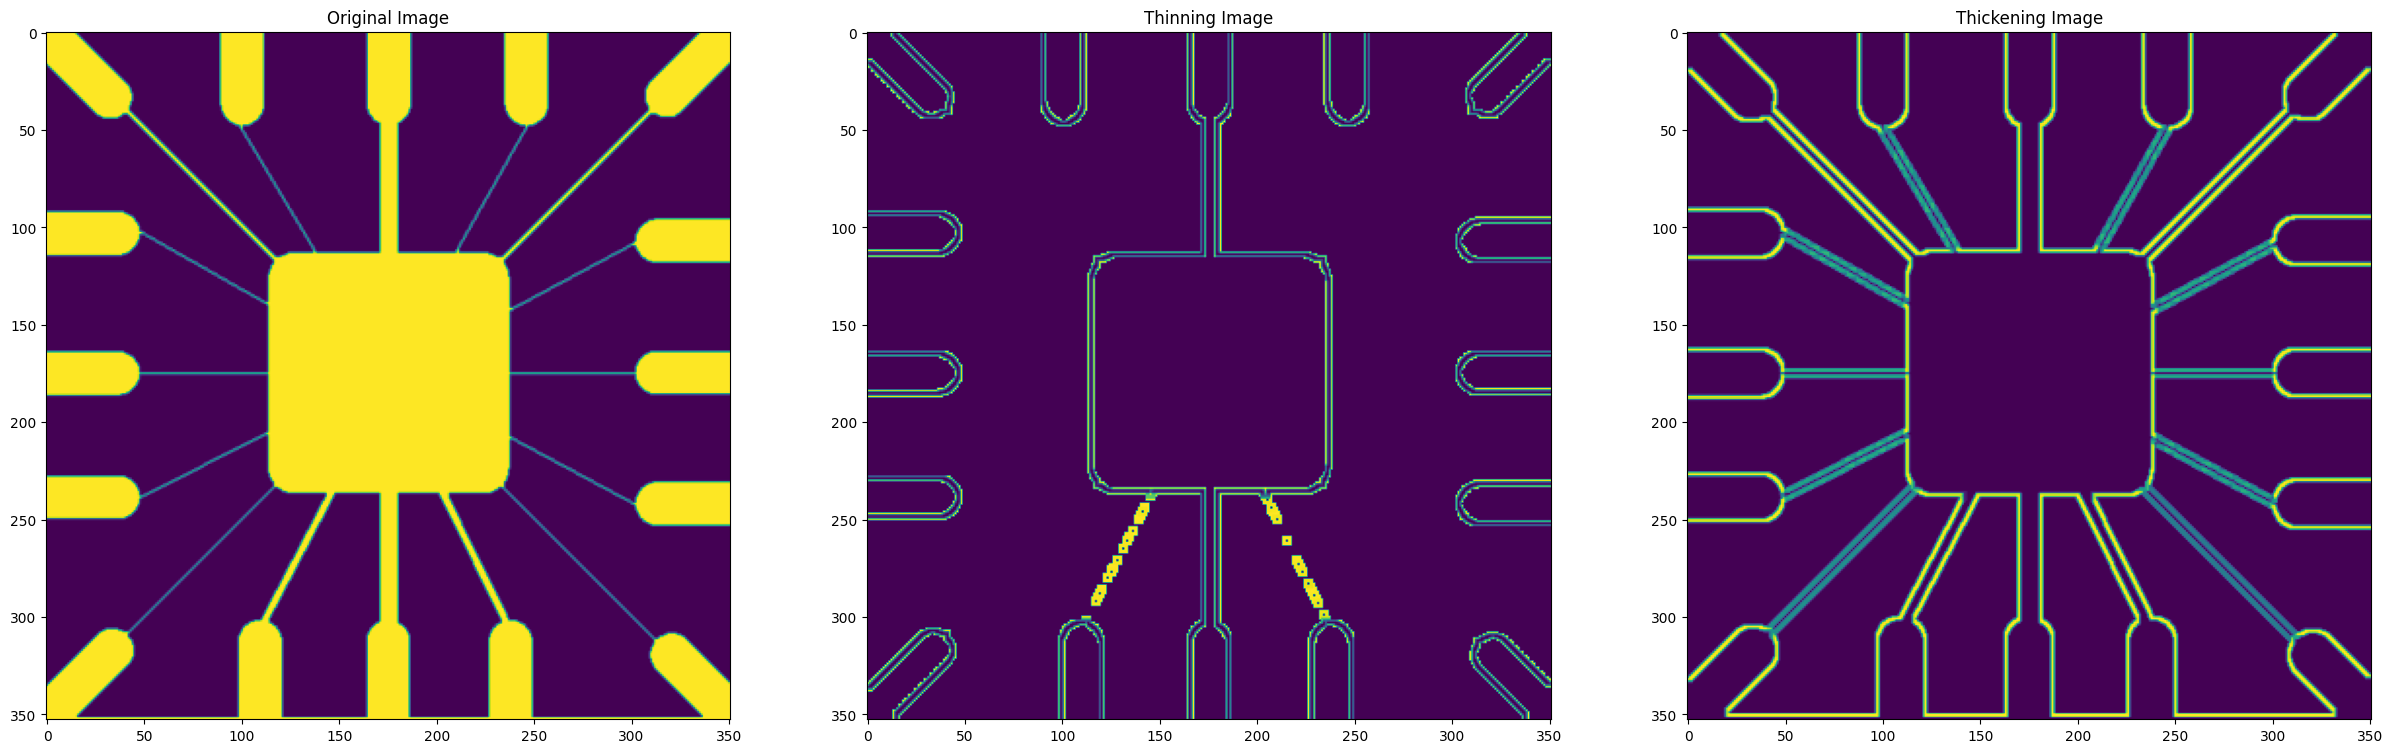

In [ ]:
# Thinning
kernel = np.ones((5,5), np.uint8)
thin = np.zeros(img.shape, dtype='uint8')
img_erosion = cv2.erode(img, kernel, iterations=1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
subset_img = img_erosion - opening
thin = cv2.bitwise_or(subset_img, thin)

# Thickening
thick = np.zeros(img.shape, dtype='uint8')
img_dilation = cv2.dilate(img, kernel, iterations=1)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
subset_img2 = img_dilation - closing
thick = cv2.bitwise_or(subset_img2, thick)

# Plotting
plt.figure(figsize=(30, 20))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')

# Thinning Image
plt.subplot(1, 3, 2)
plt.imshow(thin)
plt.title('Thinning Image')

# Thickening Image
plt.subplot(1, 3, 3)
plt.imshow(thick)
plt.title('Thickening Image')

plt.show()

# **Convex hull**
1. Load the image
2. Convert it to greyscale
3. Threshold the image
4. Find the contours
5. For each contour, find the convex hull and draw it.

In [ ]:
import cv2

# Read the image
image = cv2.imread("/content/car.webp")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find the contours in the image
contours, _ = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Check if the contour is convex
convex = cv2.isContourConvex(contours[0])

if convex:
	print('The contour is convex')
else:
	print('The contour is not convex')

The contour is convex


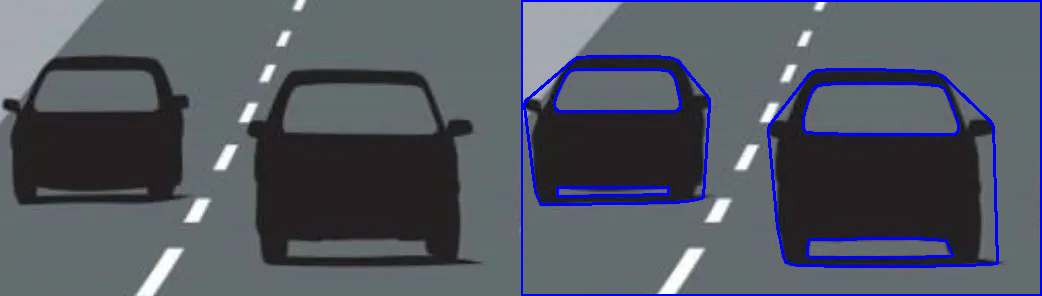

-1

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the original image
img1 = cv2.imread('/content/car.webp')

# Convert it to greyscale
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv2.threshold(img_gray, 50, 255, 0)

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw the convex hull
img_with_hull = img1.copy()

# For each contour, find the convex hull and draw it on the original image
for contour in contours:
    hull = cv2.convexHull(contour)
    cv2.drawContours(img_with_hull, [hull], -1, (255, 0, 0), 2)

# Display the original image and the image with convex hull side by side
combined_image = cv2.hconcat([img1, img_with_hull])
cv2_imshow(combined_image)
cv2.waitKey(0)

# **Skeleton**

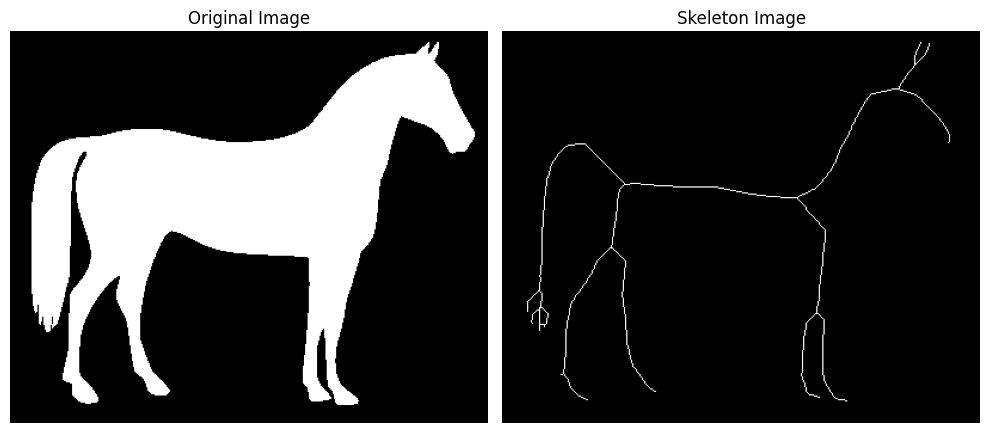

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import invert
from skimage.morphology import skeletonize

# Load and invert the image
image = invert(data.horse())

# Compute the skeleton
skeleton = skeletonize(image)

# Plotting
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')

# Skeleton Image
plt.subplot(1, 2, 2)
plt.title('Skeleton Image')
plt.imshow(skeleton, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

# **Lab 11**

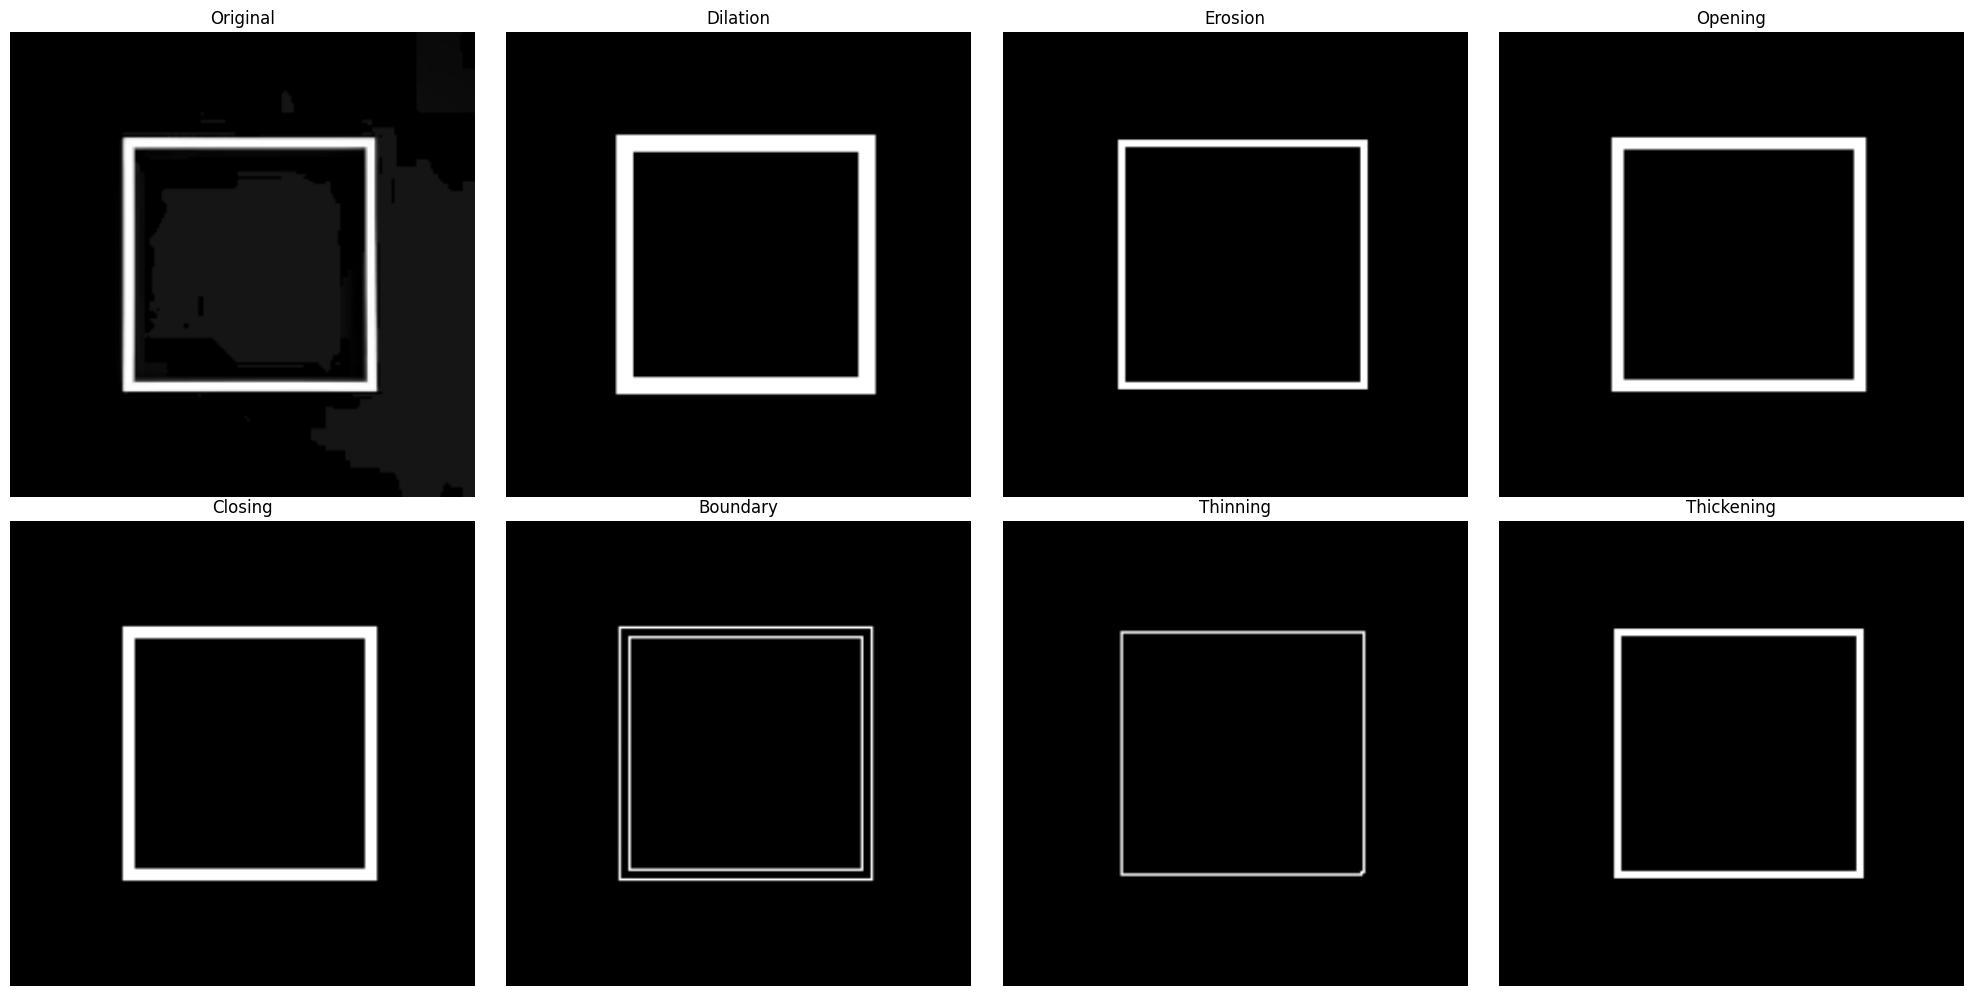

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Function to resize images to a common size
def resize_image(image, size=(400, 400)):
    return cv2.resize(image, size)

# Load the original image
img = cv2.imread("/content/input.png", 0)
# img = cv2.imread('/content/car.webp', cv2.IMREAD_GRAYSCALE)

# Threshold the image to binary
_, thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

# Structuring element
kernel = np.ones((3, 3), np.uint8)

# Dilation
dilation = cv2.dilate(thresh, kernel, iterations=1)

# Erosion
erosion = cv2.erode(thresh, kernel, iterations=1)

# Opening
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Closing
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Boundary Detection
boundary = cv2.subtract(thresh, erosion)

# Thinning
thinning = cv2.ximgproc.thinning(thresh)

# Thickening (by dilating the inverse)
thickening = cv2.bitwise_not(cv2.dilate(cv2.bitwise_not(thresh), kernel, iterations=1))

# Resize all images to the same size
common_size = (400, 400)
original_resized = resize_image(img, common_size)
dilation_resized = resize_image(dilation, common_size)
erosion_resized = resize_image(erosion, common_size)
opening_resized = resize_image(opening, common_size)
closing_resized = resize_image(closing, common_size)
boundary_resized = resize_image(boundary, common_size)
thinning_resized = resize_image(thinning, common_size)
thickening_resized = resize_image(thickening, common_size)

# Display results
titles = ['Original', 'Dilation', 'Erosion', 'Opening', 'Closing', 'Boundary', 'Thinning', 'Thickening']
images = [original_resized, dilation_resized, erosion_resized, opening_resized, closing_resized, boundary_resized, thinning_resized, thickening_resized]

plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Region Filling')

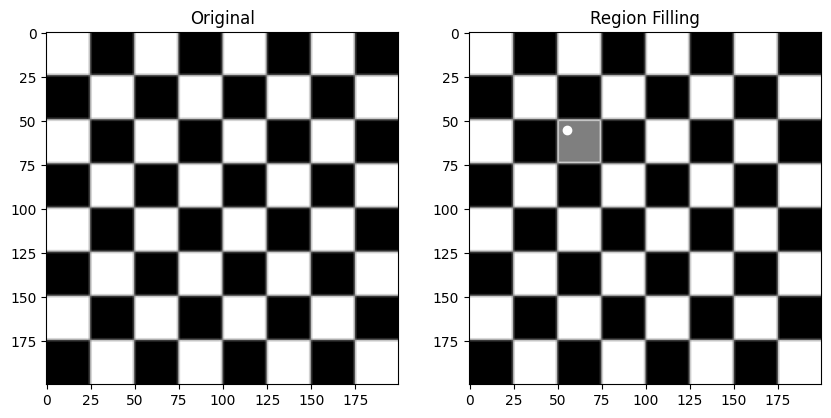

In [ ]:
# Region Filling
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill

checkers = data.checkerboard()

filled_checkers = flood_fill(checkers, (55, 55), 127)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(checkers, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filled_checkers, cmap=plt.cm.gray)
ax[1].plot(55, 55, 'wo') # seed point
ax[1].set_title('Region Filling')

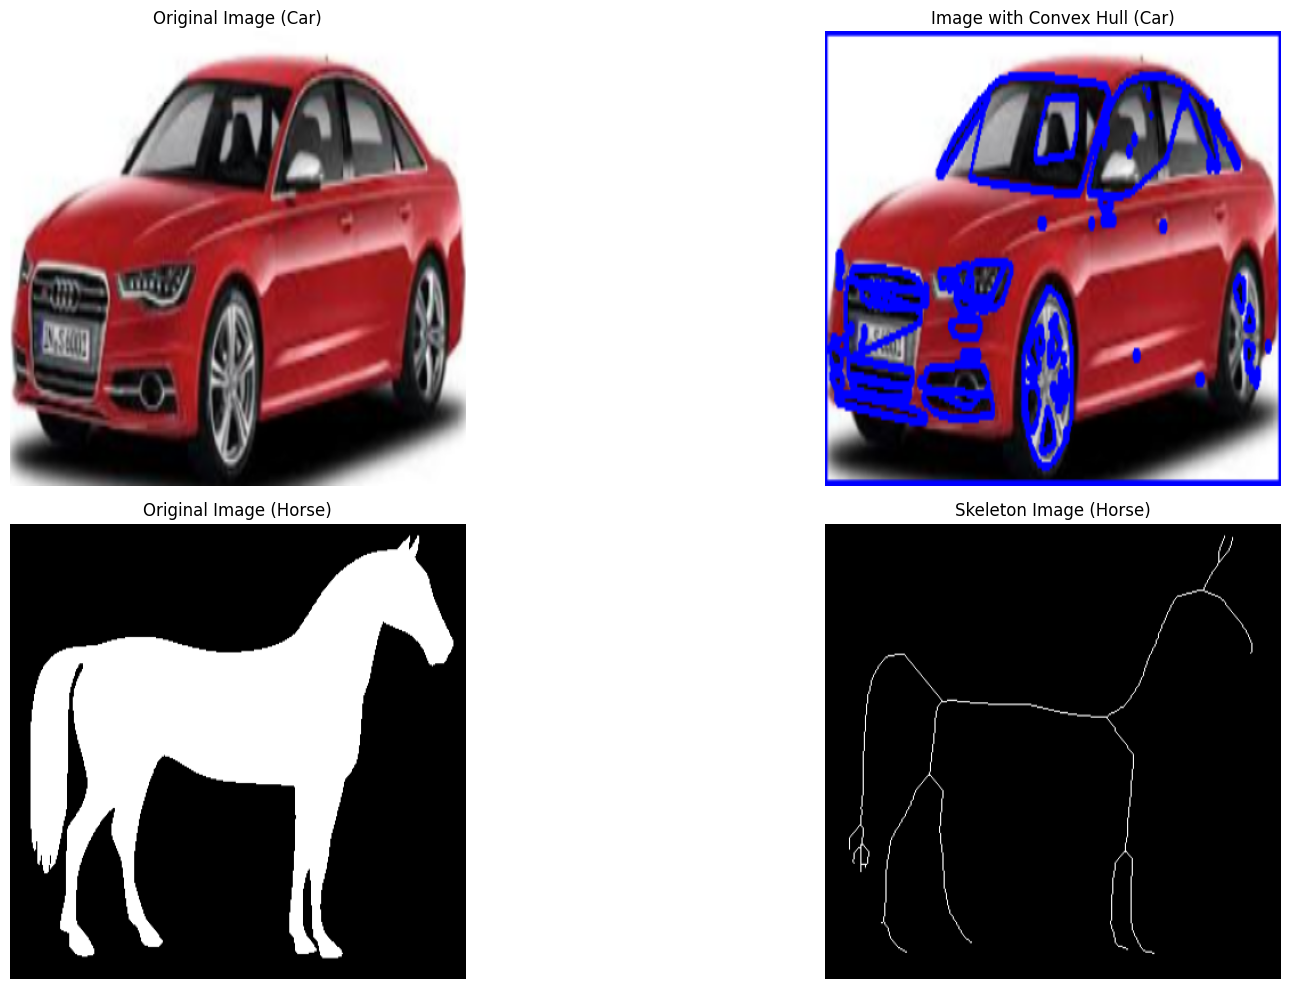

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import invert
from skimage.morphology import skeletonize

# Function to resize images to a common size
def resize_image(image, size=(400, 400)):
    return cv2.resize(image, size)

# OpenCV part for processing the car image

# Load the original image
img1 = cv2.imread('/content/car.png')

# Convert it to grayscale
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Threshold the image
ret, thresh = cv2.threshold(img_gray, 50, 255, 0)

# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw the convex hull
img_with_hull = img1.copy()

# For each contour, find the convex hull and draw it on the original image
for contour in contours:
    hull = cv2.convexHull(contour)
    cv2.drawContours(img_with_hull, [hull], -1, (255, 0, 0), 2)

# Resize the images to a common size
img1_resized = resize_image(img1)
img_with_hull_resized = resize_image(img_with_hull)

# Skimage part for computing and displaying the skeleton of a horse image

# Load and invert the image
image = invert(data.horse())

# Compute the skeleton
skeleton = skeletonize(image)

# Resize the images to a common size
image_resized = resize_image((image * 255).astype(np.uint8))
skeleton_resized = resize_image((skeleton * 255).astype(np.uint8))

# Plotting using matplotlib

plt.figure(figsize=(20, 10))

# Original Image (Car)
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img1_resized, cv2.COLOR_BGR2RGB))
plt.title('Original Image (Car)')
plt.axis('off')

# Image with Convex Hull (Car)
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img_with_hull_resized, cv2.COLOR_BGR2RGB))
plt.title('Image with Convex Hull (Car)')
plt.axis('off')

# Original Image (Horse)
plt.subplot(2, 2, 3)
plt.imshow(image_resized, cmap=plt.cm.gray)
plt.title('Original Image (Horse)')
plt.axis('off')

# Skeleton Image (Horse)
plt.subplot(2, 2, 4)
plt.imshow(skeleton_resized, cmap=plt.cm.gray)
plt.title('Skeleton Image (Horse)')
plt.axis('off')

plt.tight_layout()
plt.show()